# モンテカルロ法

In [18]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import beta, uniform
import pandas as pd
%matplotlib inline
plt.style.use("ggplot")
np.random.seed(0) # 乱数の固定

### 円に点を打って円周率を求める

In [25]:
from IPython.html.widgets import interact

NMCS = 100 # 点を打つ回数
xmc = np.random.rand(NMCS)
ymc = np.random.rand(NMCS)

@interact(mcs=(0, NMCS, 1))
def animation(mcs=0):
    plt.figure(figsize=(6,6))
    plt.xlim([0,1])
    plt.ylim([0,1])
    x = np.arange(0,1,0.001)
    y = (1 - x ** 2) ** 0.5
    y2 = np.ones(x.shape[0])
    plt.plot(x,y)
    plt.fill_between(x, y, alpha=0.3)
    plt.fill_between(x, y, y2, alpha=0.3)    
    r = (xmc[:mcs] ** 2 + ymc[:mcs] ** 2) ** 0.5
    accept = np.where(r<=1, 1 ,0) # 条件 r<=1 を満たせば 1 、満たさない場合は 0 を返す
    accept_ratio = np.sum(accept)/NMCS
    plt.scatter(xmc[:mcs], ymc[:mcs], color="black", marker=".")
    plt.show()
    print(f"Monte Carlo: {accept_ratio}")
    print(f"Analytical Solution: {np.pi / 4.0}")
    

interactive(children=(IntSlider(value=0, description='mcs'), Output()), _dom_classes=('widget-interact',))

### 解のMCS(Monte Carlo Step)依存性を可視化する
MCSを増やすごとに、解析解に漸近する様子がわかる

Text(0, 0.5, 'accept ratio')

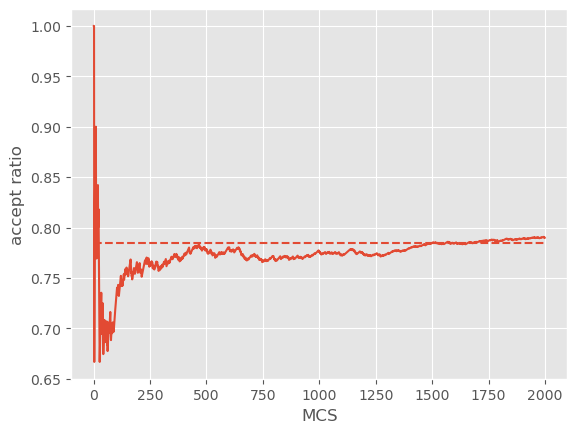

In [26]:
NMCS = 2000 # 点を打つ回数
xmc = np.random.rand(NMCS)
ymc = np.random.rand(NMCS)

pi_mcs = []
for mcs in range(1, NMCS):
    r = (xmc[:mcs] ** 2 + ymc[:mcs] ** 2) ** 0.5
    accept = np.where(r<=1, 1 ,0) # 条件 r<=1 を満たせば 1 、満たさない場合は 0 を返す
    accept_ratio = np.sum(accept)/mcs
    pi_mcs.append(accept_ratio)

pi_x = np.arange(len(pi_mcs))+1

plt.plot(pi_x, pi_mcs)
plt.hlines(0.785, pi_x[0], pi_x[-1], linestyles="dashed")
plt.xlabel("MCS")
plt.ylabel("accept ratio")

# 棄却サンプリング
モンテカルロ法を用いた基本的なサンプリングアルゴリズム

参考: https://www.udemy.com/course/pythonstan/learn/lecture/9132048#overview

### 目標とするベータ分布を描画してみる

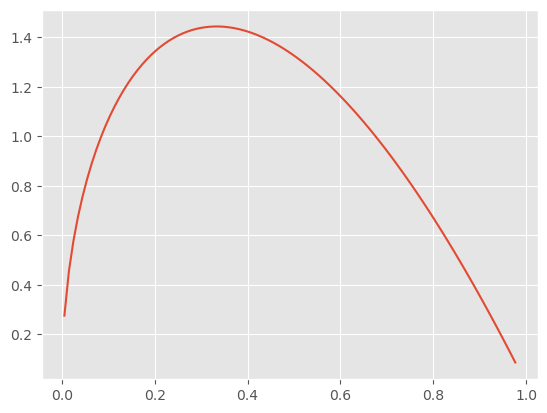

In [19]:
a, b = 1.5, 2.0
x = np.linspace(beta.ppf(0.001, a, b), beta.ppf(0.999, a, b), 100)
plt.plot(x, beta.pdf(x, a, b))

棄却サンプリング

Optimization terminated successfully.
         Current function value: -1.443376
         Iterations: 10
         Function evaluations: 20


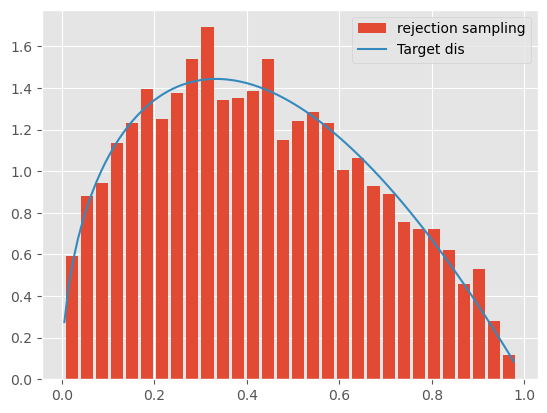

In [28]:
f = beta(a=a, b=b).pdf
res = optimize.fmin(lambda x: -f(x), 0.3)
y_max = f(res)

NMCS = 5000
x_mcs = uniform.rvs(size=NMCS)
r = uniform.rvs(size=NMCS) * y_max
accept = x_mcs[r <= f(x_mcs)]
plt.hist(accept, density=True, bins=30, rwidth=0.8, label="rejection sampling")
# beta分布の描画
x = np.linspace(beta.ppf(0.001, a, b), beta.ppf(0.999, a, b), 100)
plt.plot(x, beta.pdf(x, a, b), label="Target dis")
plt.legend()